<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>


## Application of Naive Bayes Classification on a Multidimensional Dataset with Six Predictors

#### Ritabrata Santra
#### Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences


_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Jack Xiao, Graduate Student, The University of Texas at Austin
##### [Twitter](https://twitter.com/jackxiao6) | [LinkedIn](https://www.linkedin.com/in/yuchen-jack-xiao-b1b20876/)


### Executive Summary

We have already studied Naive Bayes classification on one dimensional dataset consisting of one predictor and one response feature. The objective of this workflow is to apply Naïve Bayes classification on a multidimensional dataset, consisting of six predictor features, with multicolinearity. We learned that the accuracy of classification depends heavily on prior probability and how a continuous response feature is categorized. We recommend studying what range of priors result in a poor model with the current data. We further recommend performing sensitivity analysis of categorization of the continuous response feature to build the best Naive Bayes classification model with maximum classification accuracy.

#### Import Relevant Packages

In this step, we import the necessary packages required to perform our analysis.

In [1]:
import numpy as np                                          # ndarrys for gridded data
import pandas as pd                                         # DataFrames for tabular data
import os                                                   # set working directory, run executables
import matplotlib.pyplot as plt                             # plotting
from sklearn.model_selection import train_test_split        # train and test split datset
from sklearn.naive_bayes import GaussianNB                  # naive Bayes model and prediction
from sklearn import metrics                                 # measures to check models
import seaborn as sns                                       # for matrix scatter plots
from sklearn.metrics import classification_report           # for studying classification report of built model
from sklearn.metrics import confusion_matrix                # for studying confusion matrix 
from sklearn.metrics import roc_curve                       # for ROC curve
from sklearn.metrics import roc_auc_score                   # for AUC value

#### Setting the working directory

We set the working directory to the location of our dataset. Please feel free to modify it as necessary.

In [2]:
os.chdir("C://Users/ritab/OneDrive - The University of Texas at Austin/Fall 2020/Subsurface machine learning/project")  

#### Loading Dataset

The following workflow uses the .csv file "unconv_MV.csv", a synthetic dataset by Dr. Michael Pyrcz. The dataset is publicly available [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV.csv)  

This dataset has 1000 samples. We will work with the following features:

Response feature:
* **Production** - normalized initial production 90 day average (MCFPD).

Predictor features:
* **porosity or por** - fraction of volume of empty space in rock in units of percentage.
* **LogPerm** -Logarithm of permeability. Permeability refers to the ability of a fluid to flow through the rock. Unit of permeability is milidarcy (mD).
* **acoustic impedence** - product of sonic velocity and rock density. It has units of $kg/m^2s*10^3$
* **brittle %** - brittleness refers to the tendency of a metal to break without being significantly distorted or exposed to a high level of stress; [Reference](https://www.dictionary.com/browse/brittleness)
* **TOC (total organic carbon) %** - percentage of carbon in the rock
* **VR (vitrinite reflectance) %** - measure of the percentage of incident light reflected from the surface of vitrinite particles in a sedimentary rock; [Reference](https://wiki.aapg.org/Vitrinite_reflectance#:~:text=Vitrinite%20reflectance%20is%20a%20measure,measured%20in%20an%20individual%20sample.)

We load the dataset and view the first few rows to make sure it uploaded correctly.

In [3]:
my_data = pd.read_csv("unconv_MV.csv")                   # load the csv data file
my_data.head(n=13)                                      # preview the first 13 rows of the dataset

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919
5,6,19.47,2.04,2.73,54.37,1.42,2.12,5497.005506
6,7,12.70,1.30,3.70,43.03,0.45,1.95,1784.266285
7,8,14.15,1.23,2.53,39.43,0.79,1.54,1943.639213
8,9,16.18,1.34,3.45,45.79,0.56,1.95,3176.523611
9,10,20.51,2.48,2.78,28.99,1.78,2.24,2522.792318


#### Studying Dataset

We remove the wellindex column and study the summary statistics to look for anamolies or non-physical values in the dataset.

In [4]:
my_data = my_data.iloc[:,1:]                                # removing the well index
my_data.describe().transpose()                              # calculating summary statistics

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


#### Data cleaning

We remove negative values from TOC and Brittle, as they are non-physical, and truncate them to 0.


In [5]:
num = my_data._get_numeric_data()                           # get shallow copy of the numerical values from the DataFrame
num[num < 0] = 0                                            # truncate negative values to 0.0

#### Correlation matrix

* We study the correlation matrix to understand the presence of multicolinearity in the dataset.
* One of the main assumption of Naive Bayes classification is conditional independence. We seek to understand the effect of interactions (if any) between features in prediction.

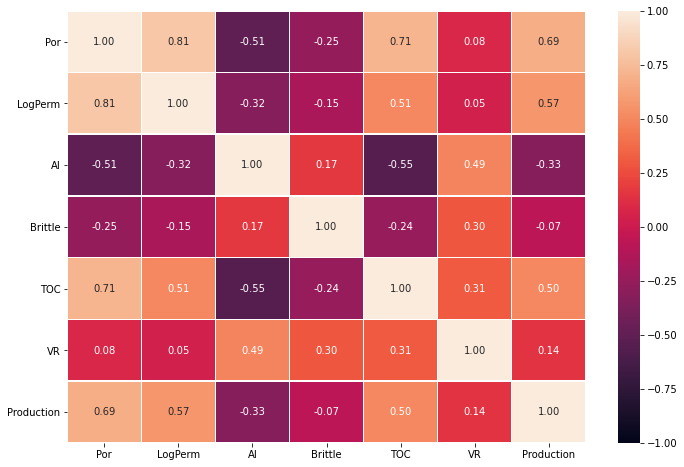

In [6]:
plt.subplot(111)                          # plot a color coded correlation matrix
sns.heatmap(my_data.iloc[:,:7].corr(),vmin = -1.0, vmax = 1.0,linewidths=.5, annot=True, fmt= '.2f')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

* We observe high correlation between predictor features: LogPerm and Por & Por and TOC. 
* Value of 1 along the diagonal describes the correlation of each variable with themselves

### Gaussian naive Bayes model
This workflow has been adapted from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_NaiveBayes.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_NaiveBayes.ipynb).

#### Catgorizing a continuos respose feature
* We convert ‘production’ to a categorical variable; above 4000 MCFPD = 1 and rest is 0

In [7]:
my_data['cProd'] = np.where(my_data['Production']>=4000, 1, 0)    # conditional statement to categorize the response feature amd assign a new feature

#### Test-train Split
* We split our dataset randomly into two parts: test and train. 
* Our aim is to tune the model parameters and hyperparameters.
* The test size is 25% and train size is the remaining 75% of data.

In [8]:
my_data_subset = my_data.iloc[:,[0,1,2,3,4,5,6,7]]                #selecting relevant columns
X_train, X_test, y_train, y_test = train_test_split(my_data_subset.iloc[:,[0,1,2,3,4,5]], my_data_subset.iloc[:,7], test_size=0.25, random_state=73073)
y_train = pd.DataFrame({'cProd':y_train.values})
y_test = pd.DataFrame({'cProd':y_test.values})

#### Studying distribution of predictor features in training datset 
* We calculate some statistics to help with plotting and future loops.
* We plot histograms to study the distribution of predicor features in training datsets.
* We observe a bell-shaped distribution in all predictor features.

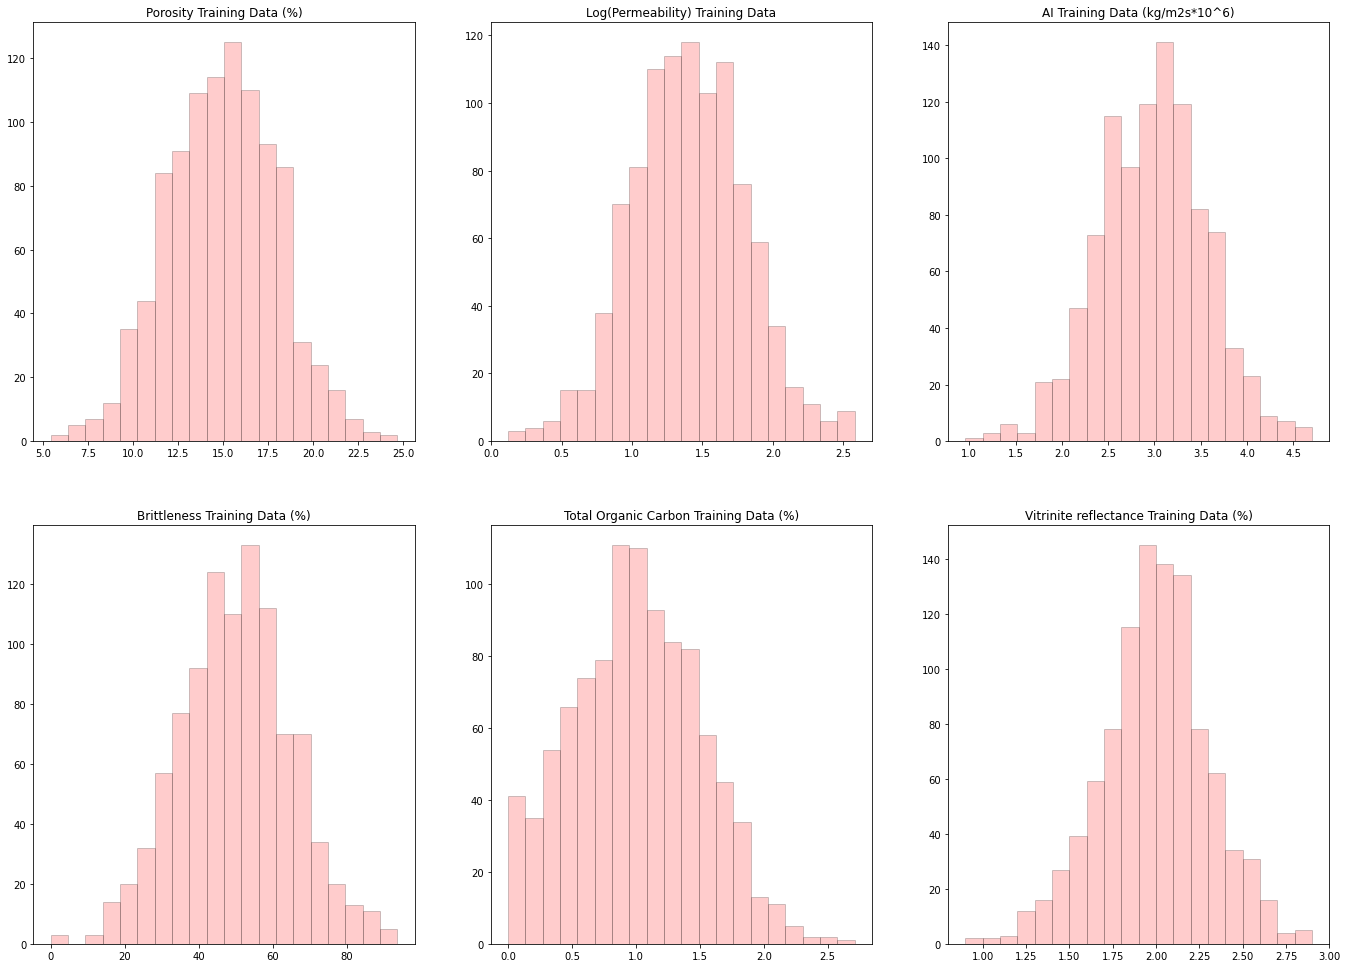

In [18]:
#calculating min and max of some predictors
x1min = np.min(my_data["Por"]); x1max = np.max(my_data["Por"])
x2min = np.min(my_data["LogPerm"]); x2max = np.max(my_data["LogPerm"])
x3min = np.min(my_data["AI"]); x3max = np.max(my_data["AI"])
x4min = np.min(my_data["Brittle"]); x4max = np.max(my_data["Brittle"])
x5min = np.min(my_data["TOC"]); x5max = np.max(my_data["TOC"])
x6min = np.min(my_data["VR"]); x6max = np.max(my_data["VR"])


#calculating, min, max and certain percentiles of response feature
ymin = np.min(my_data['Production']); ymax = np.max(my_data['Production'])
y10 = np.percentile(my_data['Production'], 10)
y25 = np.percentile(my_data['Production'], 25)
y50 = np.percentile(my_data['Production'], 50)
y75 = np.percentile(my_data['Production'], 75)
y90 = np.percentile(my_data['Production'], 90)

########## plotting histograms of predictor features in training dataset ######################
plt.subplot(231)
plt.hist(X_train["Por"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Porosity Training Data (%)')

plt.subplot(232)
plt.hist(X_train["LogPerm"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Log(Permeability) Training Data')

plt.subplot(233)
plt.hist(X_train["AI"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('AI Training Data (kg/m2s*10^6)')

plt.subplot(234)
plt.hist(X_train["Brittle"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Brittleness Training Data (%)')

plt.subplot(235)
plt.hist(X_train["TOC"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Total Organic Carbon Training Data (%)')

plt.subplot(236)
plt.hist(X_train["VR"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Vitrinite reflectance Training Data (%)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()

#### Studying distribution of predictor features in testing datset 
* We also plot histograms to study the distribution of predicor features in testing datsets.
* We observe a bell-shaped distribution in all predictor features.

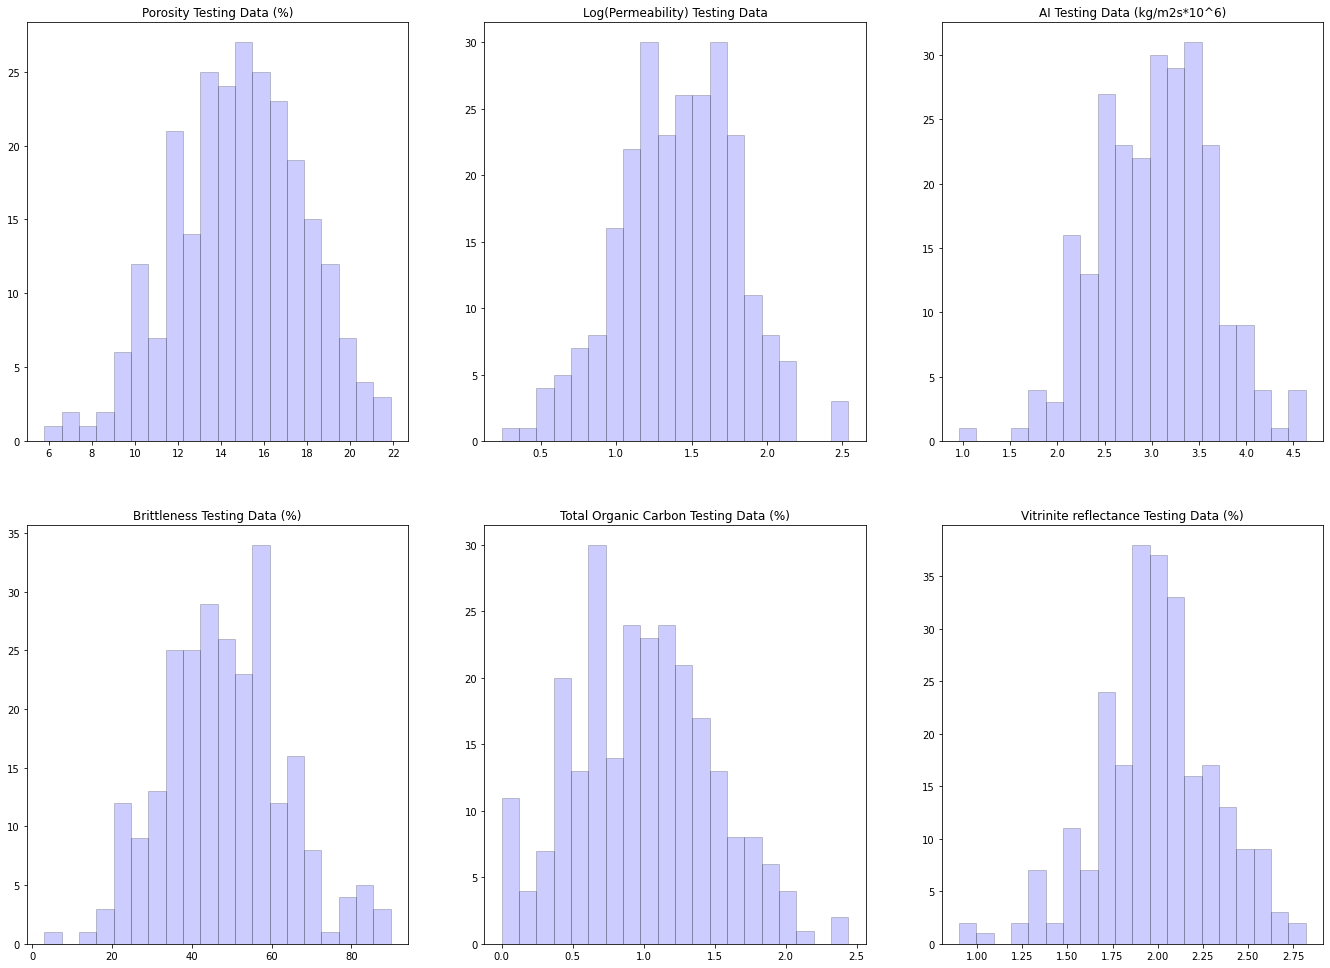

In [11]:
########## plotting histograms of predictor features in testing dataset ######################

plt.subplot(231)
plt.hist(X_test["Por"], alpha = 0.2, color = 'blue', edgecolor = 'black', bins=20)
plt.title('Porosity Testing Data (%)')

plt.subplot(232)
plt.hist(X_test["LogPerm"], alpha = 0.2, color = 'blue', edgecolor = 'black', bins=20)
plt.title('Log(Permeability) Testing Data')

plt.subplot(233)
plt.hist(X_test["AI"], alpha = 0.2, color = 'blue', edgecolor = 'black', bins=20)
plt.title('AI Testing Data (kg/m2s*10^6)')

plt.subplot(234)
plt.hist(X_test["Brittle"], alpha = 0.2, color = 'blue', edgecolor = 'black', bins=20)
plt.title('Brittleness Testing Data (%)')

plt.subplot(235)
plt.hist(X_test["TOC"], alpha = 0.2, color = 'blue', edgecolor = 'black', bins=20)
plt.title('Total Organic Carbon Testing Data (%)')

plt.subplot(236)
plt.hist(X_test["VR"], alpha = 0.2, color = 'blue', edgecolor = 'black', bins=20)
plt.title('Vitrinite reflectance Testing Data (%)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()

#### Buiding a Gaussian naive Bayes model with naïve prior (0.5)
We built a model and then study the classification report and confusion matrix. The classification report describes the following testing metrics: [Reference](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_NaiveBayes.ipynb).
    
    * recall - ratio of true positives to all cases of the category in the testing dataset
    
    * precision - ratio of true positives to all positives (true positives + false positives)
    
    * f1-score - the harmonic mean of recall and precision
    
    * support - the number of samples of each category in testing data
    
The confusion matrix is set up in the following manner:[Reference](https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png).

<p align="center">
    <img src="https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png" width="220" height="240" />
   
    
* the x axis represents prediction for category 0 or 1

* the y axis represents truth for category 0 or 1

In [12]:
priors = (0.5,0.5)   # setting the prior naive probabilities of low and high production
gnb = GaussianNB(priors = priors)                           # instantiate the Gaussian naive Bayes model
GaussianNB_fit = gnb.fit(X_train,y_train['cProd'].values)   # training with the training data
y_pred = GaussianNB_fit.predict(X_test.values)              # prediction over the testing data
print(classification_report(y_test['cProd'].values, y_pred, labels=[0,1])) #print classification report
print(confusion_matrix(y_test['cProd'].values, y_pred))             #print confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.88      0.94       222
           1       0.51      0.96      0.67        28

    accuracy                           0.89       250
   macro avg       0.75      0.92      0.80       250
weighted avg       0.94      0.89      0.91       250

[[196  26]
 [  1  27]]


We see consistent poor prediction for the '1' category, as evidenced by low precision, recall and f1-score. Let's perform sensitivity analysis to improve the model and investigate the range of prior probabilities for poor predictions.

### 1. Sensitivity analysis on prior probability 

* We aim to understand what range of priors result in a poor model with the current data. Therefore, we built models over every possible prior probability, ranging from 0 to 1.

* We create a loop which fits a Naive Bayes classification model over a given prior probability and calculates error metrics so that we can evaluate and compare all possible models. Finally, we plot the error metrics for ease of comparison.

* We study the following error metrics in graphical form:

1. precision
2. recall
3. f1-score
4. classification accuracy: percentage of correct predictions [Reference](https://www.ritchieng.com/machine-learning-evaluate-classification-model/)
5. classification error: "Misclassification Rate" or frequency of incorrect classification [Reference](https://www.ritchieng.com/machine-learning-evaluate-classification-model/)
6. specificity: ratio of true negative over all negative [Reference](https://www.ritchieng.com/machine-learning-evaluate-classification-model/)
7. false positive rate: frequency of incorrectly classifying a negative value [Reference](https://www.ritchieng.com/machine-learning-evaluate-classification-model/)
8. AUC: area under ROC curve; if it is 0.5, the classifier is as good as a random guess, however it gets better as it gets close to 1.

   ROC curve seek to answer “When it is actually the negative result, how often does it predict incorrectly?”
   or FP (false positive rate)= FP/(FP + TN). TN = true negative  [Reference](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a)

C:\Users\ritab\anaconda3\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ritab\anaconda3\lib\site-packages\sklea

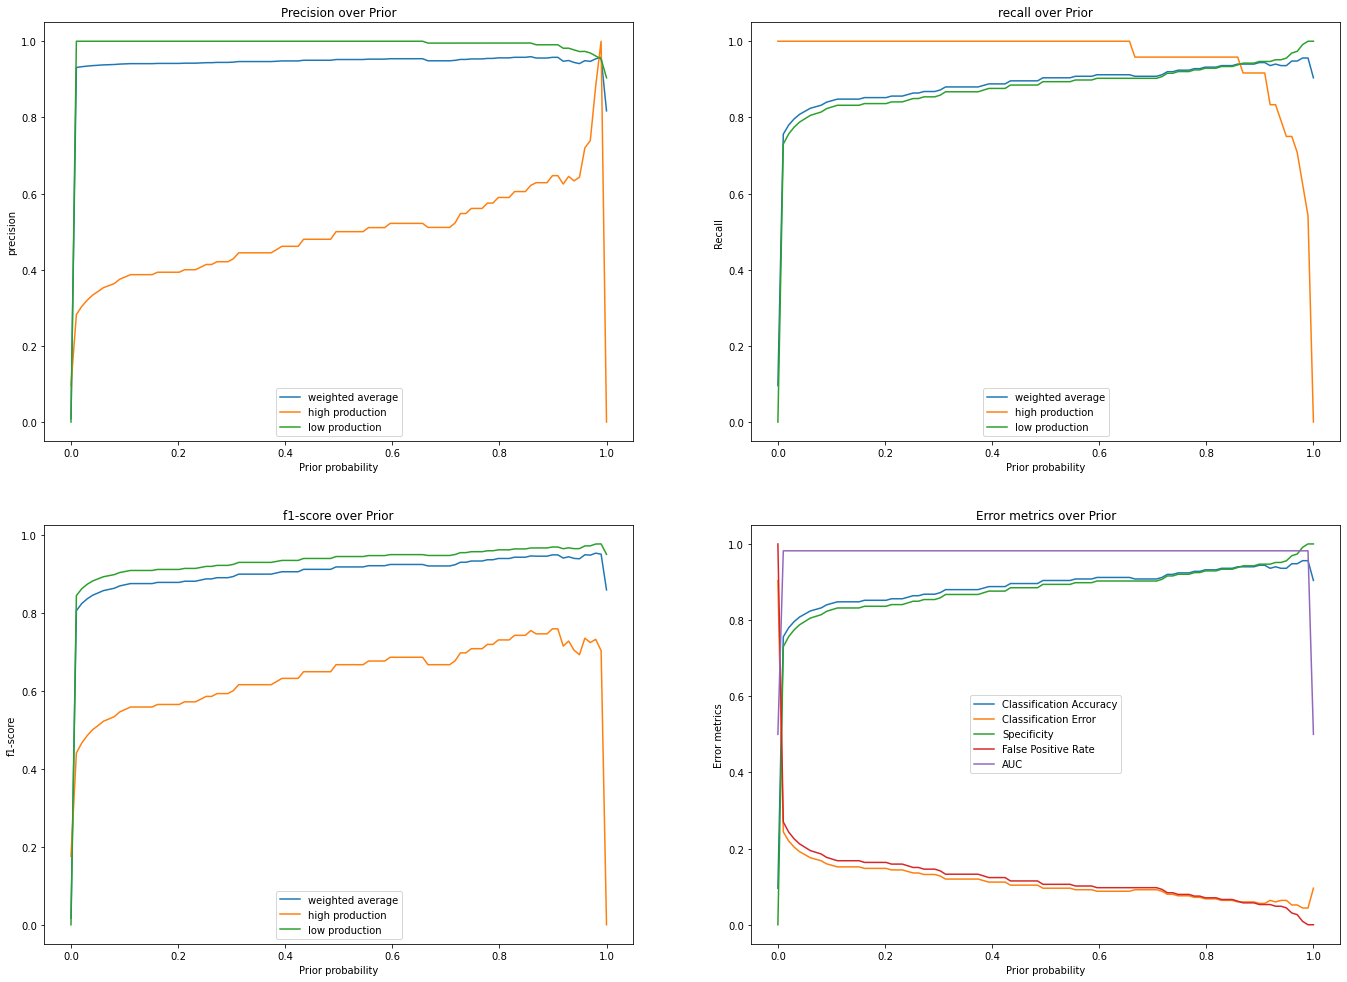

In [30]:
############## PRIOR PROBABILITY LOOP #############################

start = 0; steps = 100   #defining number of steps in the loop
p = np.linspace(start,1,steps)    #values of prior probabilities to be tested


#creating matrix of zeros to store the results
precision_avg = np.zeros(steps);precision_hp = np.zeros(steps);precision_lp = np.zeros(steps)
recall_avg  = np.zeros(steps); recall_hp  = np.zeros(steps); recall_lp  = np.zeros(steps)
f1score_avg = np.zeros(steps); f1score_hp = np.zeros(steps); f1score_lp = np.zeros(steps)
support_avg = np.zeros(steps); support_hp = np.zeros(steps); support_lp = np.zeros(steps)
classiferr = np.zeros(steps)
accuracy = np.zeros(steps)
sensitivity = np.zeros(steps)
specificity = np.zeros(steps)
falsepositiverate = np.zeros(steps)
AUC = np.zeros(steps)

for i in range(steps):
    priors = (p[i],1-p[i])  #calculating prior for the step
    gnb = GaussianNB(priors = priors)                           # instantiate the Gaussian naive Bayes model
    GaussianNB_fit = gnb.fit(X_train,y_train['cProd'].values)   # train with the training data
    y_pred = GaussianNB_fit.predict(X_test.values) # predict over the testing data
    classification_report(y_test['cProd'].values, y_pred, labels=[0,1])  #calculating classification report
    confusion = confusion_matrix(y_test['cProd'].values, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    y_pred_prob = gnb.predict_proba(X_test)[:,1]
    
    #storing classification report data at every step [weighted average values]
    precision_avg[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['weighted avg']['precision']
    recall_avg[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['weighted avg']['recall']
    f1score_avg[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['weighted avg']['f1-score']
    support_avg[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['weighted avg']['support']

    #storing classification report data at every step [high production values]
    precision_hp[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['1']['precision']
    recall_hp[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['1']['recall']
    f1score_hp[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['1']['f1-score']
    support_hp[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['1']['support']

    #storing classification report data at every step [low production values]
    precision_lp[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['0']['precision']
    recall_lp[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['0']['recall']
    f1score_lp[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['0']['f1-score']
    support_lp[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['0']['support']
    
    #storing accuracy data
    accuracy[i]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['accuracy']
    classiferr[i]=(FP + FN) / float(TP + TN + FP + FN)
    #sensitivity[i]=TP / float(FN + TP)
    specificity[i]=TN / (TN + FP)
    falsepositiverate[i]=FP / float(TN + FP)
    AUC[i] = roc_auc_score(y_test, y_pred_prob)

#######creating visualization of error metrics to assess the models built over different prior probabilites

#plt.rcParams.update({'font.size': 22})
plt.subplot(221)
plt.plot(p, precision_avg, label = 'weighted average')
plt.plot(p, precision_hp, label = 'high production')
plt.plot(p, precision_lp, label = 'low production')
plt.legend()
plt.title('Precision over Prior')
plt.xlabel('Prior probability')
plt.ylabel('precision')

plt.subplot(222)
plt.plot(p, recall_avg, label = 'weighted average')
plt.plot(p, recall_hp, label = 'high production')
plt.plot(p, recall_lp, label = 'low production')
plt.legend()
plt.title('recall over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Recall')

plt.subplot(223)
plt.plot(p, f1score_avg, label = 'weighted average')
plt.plot(p, f1score_hp, label = 'high production')
plt.plot(p, f1score_lp, label = 'low production')
plt.legend()
plt.title('f1-score over Prior')
plt.xlabel('Prior probability')
plt.ylabel('f1-score')

plt.subplot(224)
plt.plot(p, accuracy, label='Classification Accuracy')
plt.plot(p, classiferr, label='Classification Error')
plt.plot(p, specificity, label='Specificity')
plt.plot(p, falsepositiverate, label='False Positive Rate')
plt.plot(p, AUC, label='AUC')
plt.legend()
plt.title('Error metrics over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Error metrics')


plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()

#### Observations

* Classification accuracy increases monotonically with prior probability until 0.9, as evidenced by every error metric. 

* Therefore, we need to be careful and accurately implement expert observation/knowledge while choosing prior probability.

### 2. Sensitivity analysis on categorization of the continuous response feature

* We categorize our continuous response feature (Production) at five different percentiles (10th, 25th, 50th, 75th and 90th). We perform sensitivity analysis of categorization of the continuous response feature.

* We create a loop which fits a Naive Bayes classification model over a given prior probability and certain categorization of response feature. The loop also calculates error metrics so that we can evaluate and compare all possible models. Finally, we plot the error metrics for ease of comparison.

C:\Users\ritab\anaconda3\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ritab\anaconda3\lib\site-packages\sklea

C:\Users\ritab\anaconda3\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\ritab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ritab\anaconda3\lib\site-packages\sklea

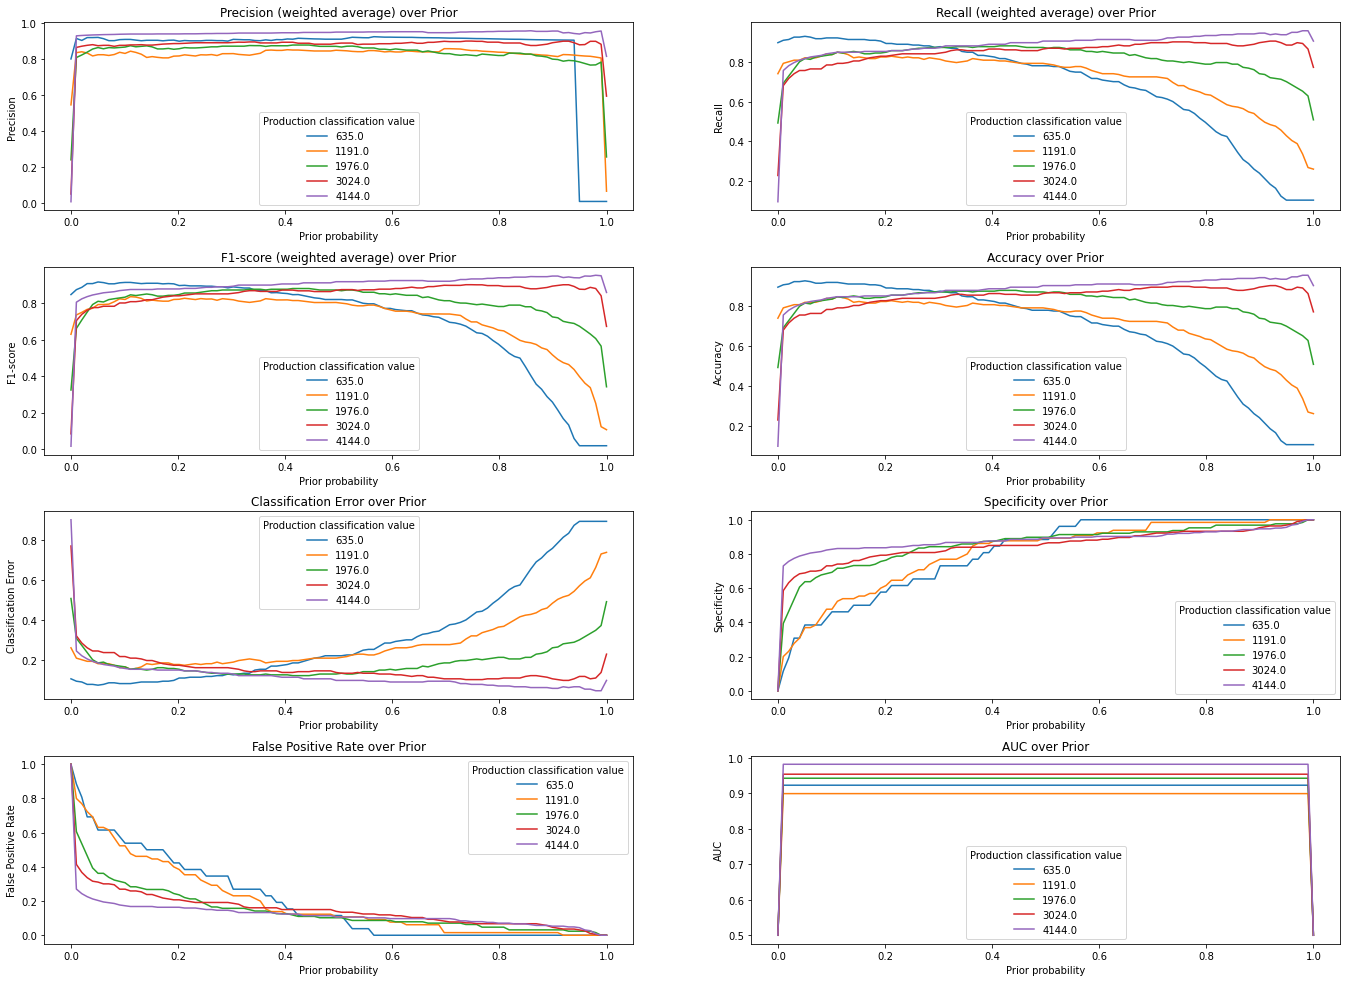

In [33]:
######################## PRODUCTION CLASSIFICATION LOOP #####################################
psteps = 5 #number of categorization points


pbreak = (y10,y25,y50,y75,y90)  #percentiles at which the response feature will be categorized and a model built



start = 0; steps = 100  #defining number of steps in the loop
p = np.linspace(start,1,steps)  #values of prior probabilities to be tested

#creating matrix of zeros to store the results
precision_avg = np.zeros((steps,psteps));precision_hp = np.zeros((steps,psteps));precision_lp = np.zeros((steps,psteps))
recall_avg  = np.zeros((steps,psteps)); recall_hp  = np.zeros((steps,psteps)); recall_lp  = np.zeros((steps,psteps))
f1score_avg = np.zeros((steps,psteps)); f1score_hp = np.zeros((steps,psteps)); f1score_lp =np.zeros((steps,psteps))
support_avg = np.zeros((steps,psteps)); support_hp = np.zeros((steps,psteps)); support_lp = np.zeros((steps,psteps))
accuracy = np.zeros((steps,psteps))
classiferr = np.zeros((steps,psteps))
sensitivity = np.zeros((steps,psteps))
specificity = np.zeros((steps,psteps))
falsepositiverate = np.zeros((steps,psteps))
AUC = np.zeros((steps,psteps))

for j in range(psteps):
    my_data = pd.read_csv("unconv_MV.csv")    #load data
    my_data = my_data.iloc[:,1:]                                # remove the well index
    num = my_data._get_numeric_data()                           # get shallow copy of the numerical values from the DataFrame
    num[num < 0] = 0                                            # truncate negative values to 0.0
    my_data['cProd'] = np.where(my_data['Production']>=pbreak[j], 1, 0)    # conditional statement assign a new feature
    my_data_subset = my_data.iloc[:,[0,1,2,3,4,5,6,7]]   #create subset of data
    #split the data into test(25%) and train (75%)
    X_train, X_test, y_train, y_test = train_test_split(my_data_subset.iloc[:,[0,1,2,3,4,5]], my_data_subset.iloc[:,7], test_size=0.25, random_state=73073)
    y_train = pd.DataFrame({'cProd':y_train.values})
    y_test = pd.DataFrame({'cProd':y_test.values})

    for i in range(steps):
        priors = (p[i],1-p[i]) #calculating prior for the step
        gnb = GaussianNB(priors = priors)                           # instantiate the Gaussian naive Bayes model
        GaussianNB_fit = gnb.fit(X_train,y_train['cProd'].values)   # train with the training data
        y_pred = GaussianNB_fit.predict(X_test.values) # predict over the testing data
        classification_report(y_test['cProd'].values, y_pred, labels=[0,1]) #calculate classification report
        confusion = confusion_matrix(y_test['cProd'].values, y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        y_pred_prob = gnb.predict_proba(X_test)[:,1]
        
        #storing classification report data at every step [weighted average values]
        precision_avg[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['weighted avg']['precision']
        recall_avg[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['weighted avg']['recall']
        f1score_avg[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['weighted avg']['f1-score']
        support_avg[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['weighted avg']['support']

        #storing classification report data at every step [high production values]
        precision_hp[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['1']['precision']
        recall_hp[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['1']['recall']
        f1score_hp[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['1']['f1-score']
        support_hp[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['1']['support']

        #storing classification report data at every step [low production values]
        precision_lp[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['0']['precision']
        recall_lp[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['0']['recall']
        f1score_lp[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['0']['f1-score']
        support_lp[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['0']['support']
        
        #storing accuracy data
        accuracy[i,j]=classification_report(y_test['cProd'].values, y_pred, labels=[0,1], output_dict=True)['accuracy']
        classiferr[i,j]=(FP + FN) / float(TP + TN + FP + FN)
        sensitivity[i,j]=TP / float(FN + TP)
        specificity[i,j]=TN / (TN + FP)
        falsepositiverate[i,j]=FP / float(TN + FP)
        AUC[i,j] = roc_auc_score(y_test, y_pred_prob)

#######creating visualization of error metrics over different prior probabilites [weighted average]

#fig1 = plt.figure(figsize=(5, 6))
#plt.rcParams.update({'font.size': 22})
plt.subplot(421)
for j in range(psteps):
    plt.plot(p, precision_avg[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('Precision (weighted average) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Precision')

plt.subplot(422)
for j in range(psteps):
    plt.plot(p, recall_avg[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('Recall (weighted average) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Recall')

plt.subplot(423)
for j in range(psteps):
    plt.plot(p, f1score_avg[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('F1-score (weighted average) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('F1-score')

plt.subplot(424)
for j in range(psteps):
    plt.plot(p, accuracy[:,j], label = np.round(pbreak[j],0))
plt.title('Accuracy over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Accuracy')
plt.legend(title='Production classification value')

plt.subplot(425)
for j in range(psteps):
    plt.plot(p, classiferr[:,j], label = np.round(pbreak[j],0))
plt.title('Classification Error over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Classification Error')
plt.legend(title='Production classification value')


plt.subplot(426)
for j in range(psteps):
    plt.plot(p, specificity[:,j], label = np.round(pbreak[j],0))
plt.title('Specificity over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Specificity')
plt.legend(title='Production classification value')

plt.subplot(427)
for j in range(psteps):
    plt.plot(p, falsepositiverate[:,j], label = np.round(pbreak[j],0))
plt.title('False Positive Rate over Prior')
plt.xlabel('Prior probability')
plt.ylabel('False Positive Rate')
plt.legend(title='Production classification value')

plt.subplot(428)
for j in range(psteps):
    plt.plot(p, AUC[:,j], label = np.round(pbreak[j],0))
plt.title('AUC over Prior')
plt.xlabel('Prior probability')
plt.ylabel('AUC')
plt.legend(title='Production classification value')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.3)
plt.show()

#### Observations

* Classification accuracy increases monotonically with the value for production classification, as evidenced by every error metric. 

* Therefore, it is important to perform sensitivity analysis of production classification or implement expert observation/knowledge.

#### Further analysis of each category by plotting error metrics

We continue to analyze the results from the previous loop. We try to plot the error metric for two categories (high and low production) seperately to see if our previous observation is consistent.



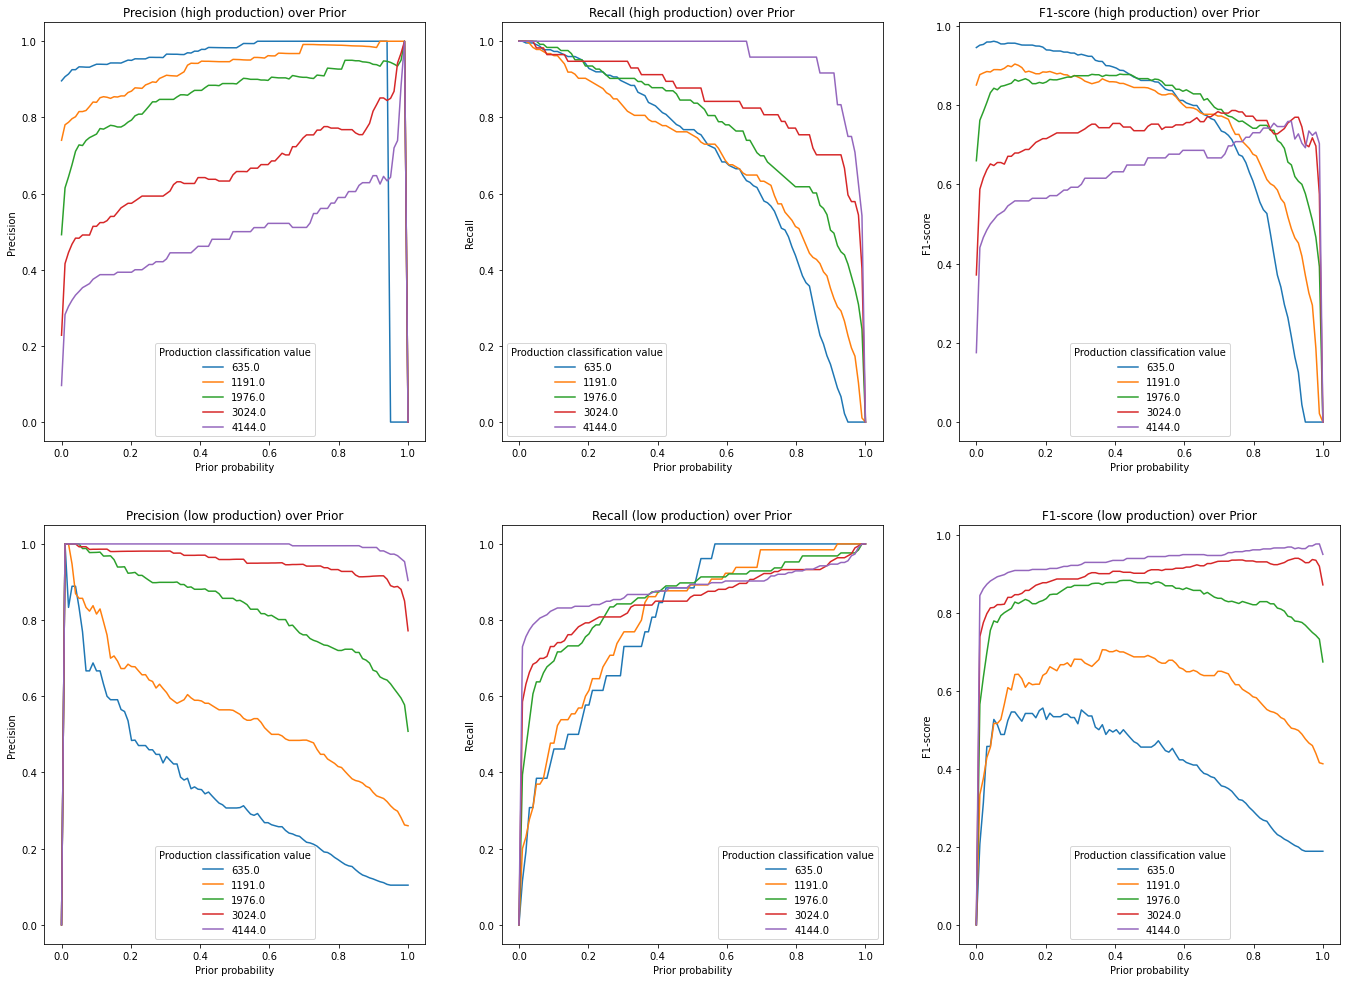

In [35]:
#######creating visualization of error metrics over different prior probabilites [high production]

#plt.rcParams.update({'font.size': 20})
plt.subplot(231)
for j in range(psteps):
    plt.plot(p, precision_hp[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('Precision (high production) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Precision')

plt.subplot(232)
for j in range(psteps):
    plt.plot(p, recall_hp[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('Recall (high production) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Recall')

plt.subplot(233)
for j in range(psteps):
    plt.plot(p, f1score_hp[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('F1-score (high production) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('F1-score')

#######creating visualization of error metrics over different prior probabilites [low production]

#plt.rcParams.update({'font.size': 20})
plt.subplot(234)
for j in range(psteps):
    plt.plot(p, precision_lp[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('Precision (low production) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Precision')

plt.subplot(235)
for j in range(psteps):
    plt.plot(p, recall_lp[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('Recall (low production) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('Recall')

plt.subplot(236)
for j in range(psteps):
    plt.plot(p, f1score_lp[:,j], label = np.round(pbreak[j],0))
plt.legend(title='Production classification value')
plt.title('F1-score (low production) over Prior')
plt.xlabel('Prior probability')
plt.ylabel('F1-score')


plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()


#### Observation

Our previous observation holds for each categories. Classification accuracy increases monotonically with the value for production classification. 


### Re-train model by recategorzing response feature for highest classification accuracy

* Based on our sensitivity analysis, we built our final model with a prior probability of 0.9 (assuming this is the global trend/expert knowledge) and production categorized at P90 value.
* This model has the highest classification accuracy for the given dataset.

The code for plotting the ROC curve is adapted from Hugo Ferreira. [Reference](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a)

AUC is  0.9841445427728613 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       900
           1       0.69      0.92      0.79       100

    accuracy                           0.95      1000
   macro avg       0.84      0.94      0.88      1000
weighted avg       0.96      0.95      0.95      1000

[[858  42]
 [  8  92]]


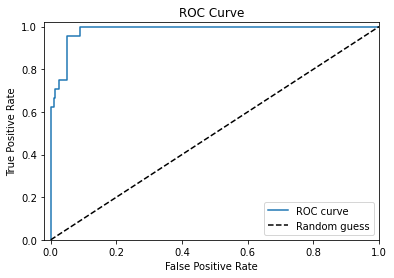

In [17]:
pbreak = y90

my_data = pd.read_csv("unconv_MV.csv")    
my_data = my_data.iloc[:,1:]                                # remove the well index
num = my_data._get_numeric_data()                           # get shallow copy of the numerical values from the DataFrame
num[num < 0] = 0                                            # truncate negative values to 0.0
my_data['cProd'] = np.where(my_data['Production']>=pbreak, 1, 0)    # conditional statement assign a new feature
my_data_subset = my_data.iloc[:,[0,1,2,3,4,5,6,7]]                
X_train = my_data_subset.iloc[:,[0,1,2,3,4,5]]
y_train =  my_data_subset.iloc[:,7]
y_train = pd.DataFrame({'cProd':y_train.values})

priors = (0.9,0.1)

gnb = GaussianNB(priors = priors)                           # instantiate the Gaussian naive Bayes model
GaussianNB_fit = gnb.fit(X_train,y_train['cProd'].values)   # train with the training data
y_pred = GaussianNB_fit.predict(X_train.values) # predict over the testing data

#creating plots for ROC curve
y_pred_prob = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# printing AUC, classification report and confusion matrix
print("AUC is ", roc_auc_score(y_test, y_pred_prob),"\n")
print(classification_report(y_train['cProd'].values, y_pred, labels=[0,1]))
print(confusion_matrix(y_train['cProd'].values, y_pred))

We study all the error metrics. Overall precision, recall and AUC is very close to 1. Although the precision is low for category 1, we can conclude that this is the best possible model with the highest classification rate, if the prior probability is 0.9.

### Results

* We sucessfully applied Naive Bayes method to a multidimensional dataset with multicolinearity.
* We studied what range of priors result in a poor model with the current data and performed sensitivity analysis of response feature categorization on classification accuracy.
* We developed a Naive Bayes classification model with the highest classification accuracy (95%) for this dataset, assuming a prior probability of 0.9.



I hope this was helpful. Please feel free to reach out with any questions. I am available for full-time positions starting May 2021.

*Ritabrata Santra*


#### [LinkedIn](https://www.linkedin.com/in/ritabratasantra/)
__________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
